# LAB09

## logistic regression for XOR

In [2]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cost_val, w_val = sess.run(
                  [train, cost, W], feed_dict={X: x_data, Y: y_data}
        )
        if step % 1000 == 0:
            print(step, cost_val, w_val)

    # Accuracy report
    h, c, a = sess.run(
              [hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

'''
Accuracy:  0.5
'''

0 0.8353147 [[ 2.1289144 ]
 [-0.06878974]]
1000 0.6931792 [[0.02389885]
 [0.01948566]]
2000 0.6931472 [[0.00042996]
 [0.0004216 ]]
3000 0.6931471 [[8.340132e-06]
 [8.328124e-06]]
4000 0.6931472 [[1.6236635e-07]
 [1.6227949e-07]]
5000 0.6931472 [[8.7860414e-08]
 [8.7773557e-08]]
6000 0.6931472 [[8.7860414e-08]
 [8.7773557e-08]]
7000 0.6931472 [[8.7860414e-08]
 [8.7773557e-08]]
8000 0.6931472 [[8.7860414e-08]
 [8.7773557e-08]]
9000 0.6931472 [[8.7860414e-08]
 [8.7773557e-08]]
10000 0.6931472 [[8.7860414e-08]
 [8.7773557e-08]]

Hypothesis:  [[0.5]
 [0.5]
 [0.5]
 [0.5]] 
Correct:  [[0.]
 [0.]
 [0.]
 [0.]] 
Accuracy:  0.5


'\nHypothesis:  [[ 0.5]\n [ 0.5]\n [ 0.5]\n [ 0.5]]\nCorrect:  [[ 0.]\n [ 0.]\n [ 0.]\n [ 0.]]\nAccuracy:  0.5\n'

logistic regression으로는 XOR 문제를 풀 수 없다. <br>
단순한 데이터 셋으로 10000번 iteration을 돌려도 Accuracy는 0.5 밖에 안됨

## NN for XOR
### (1) normal NN

In [5]:
tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cost_val = sess.run([train, cost], feed_dict={X: x_data, Y: y_data})
        if step % 1000 == 0:
            print(step, cost_val)

    # Accuracy report
    h, p, a = sess.run(
        [hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    
    print(f"\nHypothesis:\n{h} \nPredicted:\n{p} \nAccuracy:\n{a}")


''' 
Accuracy:
1.0
'''

0 1.065737
1000 0.69102114
2000 0.6584269
3000 0.55755436
4000 0.42398483
5000 0.12435085
6000 0.05884724
7000 0.03762524
8000 0.027431522
9000 0.021501211
10000 0.017641194

Hypothesis:
[[0.02054024]
 [0.9833984 ]
 [0.98498195]
 [0.01776522]] 
Predicted:
[[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:
1.0


' \nAccuracy:\n1.0\n'

### wide NN

layer를 더 wide하게 조절 (# of layer1 output: 2 -> 10)

In [6]:
tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cost_val = sess.run([train, cost], feed_dict={X: x_data, Y: y_data})
        if step % 1000 == 0:
            print(step, cost_val)

    # Accuracy report
    h, p, a = sess.run(
        [hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    
    print(f"\nHypothesis:\n{h} \nPredicted:\n{p} \nAccuracy:\n{a}")

0 0.74125326
1000 0.2483334
2000 0.07161234
3000 0.03488757
4000 0.021904558
5000 0.015626885
6000 0.012012463
7000 0.0096921595
8000 0.008088541
9000 0.006919774
10000 0.006033147

Hypothesis:
[[0.00389144]
 [0.9931226 ]
 [0.99446833]
 [0.00775194]] 
Predicted:
[[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:
1.0


layer를 좁게 설정했을때, (# of layer1 output = 2) <br>
Hypothesis: <br>
[[0.02054024] <br>
 [0.9833984 ] <br>
 [0.98498195] <br>
 [0.01776522]]<br><br>
 

layer를 넓게 설정했을때, (# of layer1 output = 10) <br>
Hypothesis: <br>
[[0.00389144] <br>
 [0.9931226 ] <br>
 [0.99446833] <br>
 [0.00775194]] <br><br>
 
=> Hypothesis의 값이 Y값에 더 가까워진다.


### wide and deep NN

In [8]:
tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 10]), name='weight2')
b2 = tf.Variable(tf.random_normal([10]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([10, 10]), name='weight3')
b3 = tf.Variable(tf.random_normal([10]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.random_normal([10, 1]), name='weight4')
b4 = tf.Variable(tf.random_normal([1]), name='bias4')
hypothesis = tf.sigmoid(tf.matmul(layer3, W4) + b4)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cost_val = sess.run([train, cost], feed_dict={X: x_data, Y: y_data})
        if step % 1000 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run(
        [hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)


'''
Hypothesis:  [[  7.80511764e-04]
 [  9.99238133e-01]
 [  9.98379230e-01]
 [  1.55659032e-03]]
'''

0 1.4716208
1000 0.56726146
2000 0.035486676
3000 0.011283865
4000 0.006246767
5000 0.0042090863
6000 0.0031331265
7000 0.0024763397
8000 0.0020370986
9000 0.0017241689
10000 0.0014908058

Hypothesis:  [[0.00117314]
 [0.9984368 ]
 [0.9985801 ]
 [0.00180161]] 
Correct:  [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:  1.0


'\nHypothesis:  [[  7.80511764e-04]\n [  9.99238133e-01]\n [  9.98379230e-01]\n [  1.55659032e-03]]\n'

=> 이전의 방법들보다 Hypothesis의 값이 Y값에 더 가까워진다.

## Exercise
### wide and deep NN for MNIST

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 1.835453442
Epoch: 0002, Cost: 1.121580465
Epoch: 0003, Cost: 0.887104101
Epoch: 0004, Cost: 0.767083466
Epoch: 0005, Cost: 0.688384049
Epoch: 0006, Cost: 0.630046485
Epoch: 0007, Cost: 0.583999566
Epoch: 0008, Cost: 0.546748790
Epoch: 0009, Cost: 0.515564668
Epoch: 0010, Cost: 0.488779429
Epoch: 0011, Cost: 0.466196669
Epoch: 0012, Cost: 0.446091578
Epoch: 0013, Cost: 0.428645722
Epoch: 0014, Cost: 0.413385216
Epoch: 0015, Cost: 0.399728788
Learning finished
Accuracy:  0.8767
Label: [2]
Prediction: [7]


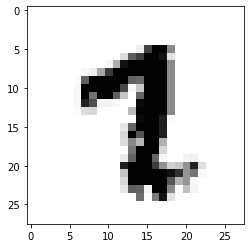

In [66]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import random
import time

tf.reset_default_graph() 

tf.set_random_seed(777)

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

with tf.name_scope("Layer1"):
    W1 = tf.Variable(tf.random_normal([784, 50]))
    b1 = tf.Variable(tf.random_normal([50]))
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
    
    tf.summary.histogram("W1",W1)
    tf.summary.histogram("b1",b1)
    tf.summary.histogram("Layer1",layer1)

with tf.name_scope("Layer2"):
    W2 = tf.Variable(tf.random_normal([50, 40]))
    b2 = tf.Variable(tf.random_normal([40]))
    layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)
    
    tf.summary.histogram("W2",W2)
    tf.summary.histogram("b2",b2)
    tf.summary.histogram("Layer2",layer2)
    

with tf.name_scope("Layer3"):
    W3 = tf.Variable(tf.random_normal([40, 20]))
    b3 = tf.Variable(tf.random_normal([20]))
    layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)
    
    tf.summary.histogram("W3",W3)
    tf.summary.histogram("b3",b3)
    tf.summary.histogram("Layer3",layer3)

with tf.name_scope("Layer4"):
    W4 = tf.Variable(tf.random_normal([20, nb_classes]))
    b4 = tf.Variable(tf.random_normal([nb_classes]))
    hypothesis = tf.nn.softmax(tf.matmul(layer3, W4) + b4)

    tf.summary.histogram("W4",W4)
    tf.summary.histogram("b4",b4)
    tf.summary.histogram("Hypothesis",hypothesis)
    

with tf.name_scope("Cost"):
    cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
    tf.summary.histogram("Cost",cost)
    
with tf.name_scope("Train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
    
# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
tf.summary.scalar("accuracy", accuracy)

# parameters
training_epochs = 15
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)


with tf.Session() as sess:
    # tensorboard --logdir= (in cmd)
    merged_summary = tf.summary.merge_all()
    
    writer = tf.summary.FileWriter("C:\\Users\\SAMSUNG\\tb\\mnist")
    writer.add_graph(sess.graph)  # Show the graph
                         
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) 
            _, summary, c = sess.run([optimizer, merged_summary, cost], feed_dict={X: batch_xs, Y: batch_ys})
            writer.add_summary(summary, global_step=100)
            avg_cost += c / total_batch
                
        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finished")    

    # Test the model using test sets

    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )
    acc1 = accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels})
                         
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, 1),feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

=> logistic regression (Accuracy:0.8895) 랑 Accuracy에 큰 차이 없음(?) <br>

## Tensorboard

In [70]:
import tensorflow as tf
import numpy as np

tf.reset_default_graph() 

tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2], name="x")
Y = tf.placeholder(tf.float32, [None, 1], name="y")

with tf.name_scope("Layer1"):
    W1 = tf.Variable(tf.random_normal([2, 2]), name="weight_1")
    b1 = tf.Variable(tf.random_normal([2]), name="bias_1")
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

    tf.summary.histogram("W1", W1)
    tf.summary.histogram("b1", b1)
    tf.summary.histogram("Layer1", layer1)


with tf.name_scope("Layer2"):
    W2 = tf.Variable(tf.random_normal([2, 1]), name="weight_2")
    b2 = tf.Variable(tf.random_normal([1]), name="bias_2")
    hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

    tf.summary.histogram("W2", W2)
    tf.summary.histogram("b2", b2)
    tf.summary.histogram("Hypothesis", hypothesis)

# cost/loss function
with tf.name_scope("Cost"):
    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
    tf.summary.scalar("Cost", cost)

with tf.name_scope("Train"):
    train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
tf.summary.scalar("accuracy", accuracy)

# Launch graph
with tf.Session() as sess:
    # tensorboard --logdir=./logs/xor_logs
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter("C:\\Users\\SAMSUNG\\tb")
    writer.add_graph(sess.graph)  # Show the graph

    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, summary, cost_val = sess.run(
            [train, merged_summary, cost], feed_dict={X: x_data, Y: y_data}
        )
        writer.add_summary(summary, global_step=step)

        if step % 1000 == 0:
            print(step, cost_val)

    # Accuracy report
    h, p, a = sess.run(
        [hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    
    print(f"\nHypothesis:\n{h} \nPredicted:\n{p} \nAccuracy:\n{a}")

0 0.7168676
1000 0.02237371
2000 0.006315451
3000 0.0027729846
4000 0.0014256197
5000 0.00078985246
6000 0.0004553499
7000 0.00026845094
8000 0.00016037926
9000 9.653442e-05
10000 5.836957e-05

Hypothesis:
[[6.1333179e-05]
 [9.9993688e-01]
 [9.9995077e-01]
 [5.9783459e-05]] 
Predicted:
[[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:
1.0


tensorboard 실행 안됨
=> 13장에서 다시